In [12]:
import pandas as pd
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare stopwords and punctuation set
stop_words = set(stopwords.words('english')).union(set(string.punctuation))

# Load the dataset from a txt file
df = pd.read_csv('text03b.txt', sep='\t')  

# Define a function to clean the text by removing stopwords and punctuation
def remove_stopwords_and_punctuation(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [word for word in word_tokens if not word.lower() in stop_words]
    return ' '.join(filtered_sentence)

# Apply the cleaning function to the 'Text' column
df['Text'] = df['Text'].apply(remove_stopwords_and_punctuation)

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size=0.20, random_state=42)

# Initialize a CountVectorizer with n-gram range you prefer (e.g., unigrams to trigrams)
vectorizer = CountVectorizer(ngram_range=(1, 3))

# Fit the vectorizer on the training data and transform both training and test data
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Create and train the Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

# Predict the labels on the test set
y_pred = clf.predict(X_test_counts)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Multinomial Naive Bayes classifier: {accuracy:.3f}')

Accuracy of the Multinomial Naive Bayes classifier: 0.758


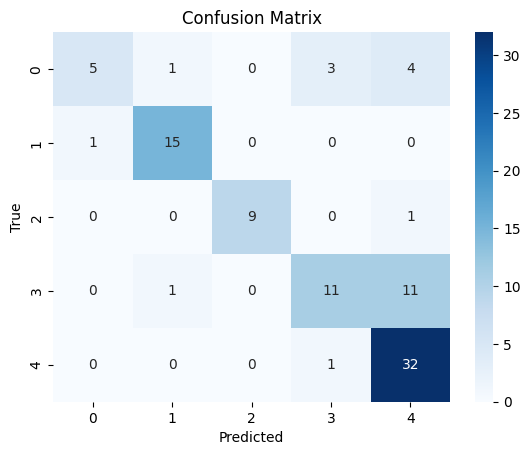

In [13]:
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()